In [1]:
import pandas as pd

In [2]:
df = pd.read_excel('日环比.xlsx')
df

,date,number
0,2021-01-01,30
1,2021-01-02,20
2,2021-01-03,40
3,2021-01-04,35
4,2021-01-05,50
5,2021-01-06,45
6,2021-01-07,15
7,2021-01-08,30
8,2021-01-09,60
9,2021-01-10,30


In [3]:
df['last_day'] = df['number'].shift()  # 周期数移动索引
df

,date,number,last_day
0,2021-01-01,30,NaN
1,2021-01-02,20,30.0
2,2021-01-03,40,20.0
3,2021-01-04,35,40.0
4,2021-01-05,50,35.0
5,2021-01-06,45,50.0
6,2021-01-07,15,45.0
7,2021-01-08,30,15.0
8,2021-01-09,60,30.0
9,2021-01-10,30,60.0


In [4]:
df['day_on_day_ratio'] = (df.number-df.last_day)/df.last_day*100
df['day_on_day_ratio'] = df['day_on_day_ratio'].fillna(0.0).map(lambda x: round(x, 2))
df

,date,number,last_day,day_on_day_ratio
0,2021-01-01,30,NaN,0.00
1,2021-01-02,20,30.0,-33.33
2,2021-01-03,40,20.0,100.00
3,2021-01-04,35,40.0,-12.50
4,2021-01-05,50,35.0,42.86
5,2021-01-06,45,50.0,-10.00
6,2021-01-07,15,45.0,-66.67
7,2021-01-08,30,15.0,100.00
8,2021-01-09,60,30.0,100.00
9,2021-01-10,30,60.0,-50.00


In [5]:
df.drop('last_day', axis=1, inplace=True)
df['date'] = pd.to_datetime(df['date'])
df

,date,number,day_on_day_ratio
0,2021-01-01,30,0.00
1,2021-01-02,20,-33.33
2,2021-01-03,40,100.00
3,2021-01-04,35,-12.50
4,2021-01-05,50,42.86
5,2021-01-06,45,-10.00
6,2021-01-07,15,-66.67
7,2021-01-08,30,100.00
8,2021-01-09,60,100.00
9,2021-01-10,30,-50.00


<AxesSubplot:xlabel='date'>

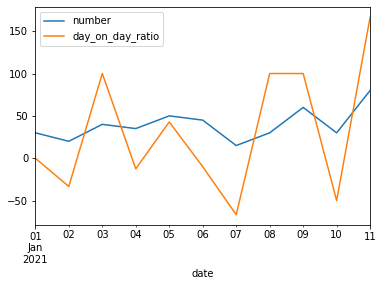

In [6]:
df.plot(x='date', y=['number', 'day_on_day_ratio'])